################################################

Owner: Arnab Das

Dataset: mnist

##############################################

# Autoencoders in Tensorflow

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras import models
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input, Lambda
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose, Activation, Reshape
from keras import backend as K
from keras.datasets import mnist
from keras.preprocessing import image

Using TensorFlow backend.


In [ ]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

* ## Using MLP




In [ ]:
X_train_MLP = x_train.reshape((x_train.shape[0],x_train.shape[1]*x_train.shape[2]))
X_test_MLP = x_test.reshape((x_test.shape[0],x_test.shape[1]*x_test.shape[2]))

In [ ]:
# Creating the model
## Encoder
ip = Input(shape=(784,))
fc1 = Dense(512)(ip)
act1 = Activation('relu')(fc1)
fc2 = Dense(256)(act1)
act2 = Activation('relu')(fc2)
fc3 = Dense(256)(act2)
act3 = Activation('relu')(fc3)
fc4 = Dense(128)(act3)
code = Activation('relu')(fc4)
## Decoder
fc5 = Dense(256)(code)
act4 = Activation('relu')(fc5)
fc6 = Dense(X_train_MLP.shape[-1])(act4)

act_op_relu = Activation('relu')(fc6)
act_op_sigmoid = Activation('sigmoid')(fc6)

In [ ]:
autoencoder_MLP1 = Model(ip, act_op_relu)
autoencoder_MLP1.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
autoencoder_MLP2 = Model(ip, act_op_sigmoid)
autoencoder_MLP2.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
# Uses ReLU
autoencoder_MLP1.fit(X_train_MLP, X_train_MLP,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test_MLP, X_test_MLP))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 213us/step - loss: 0.3054 - accuracy: 0.8004 - val_loss: 0.2729 - val_accuracy: 0.8003
Epoch 2/10
60000/60000 [==============================] - 13s 210us/step - loss: 0.2434 - accuracy: 0.8027 - val_loss: 0.2541 - val_accuracy: 0.7968
Epoch 3/10
60000/60000 [==============================] - 12s 208us/step - loss: 0.2302 - accuracy: 0.8038 - val_loss: 0.2171 - val_accuracy: 0.8030
Epoch 4/10
60000/60000 [==============================] - 13s 214us/step - loss: 0.2400 - accuracy: 0.8034 - val_loss: 0.2301 - val_accuracy: 0.8022
Epoch 5/10
60000/60000 [==============================] - 13s 213us/step - loss: 0.2295 - accuracy: 0.8036 - val_loss: 0.2158 - val_accuracy: 0.8035
Epoch 6/10
60000/60000 [==============================] - 13s 210us/step - loss: 0.2347 - accuracy: 0.8020 - val_loss: 0.2242 - val_accuracy: 0.8010
Epoch 7/10
60000/60000 [==============================] 

In [ ]:
#Uses Sigmoid
autoencoder_MLP2.fit(X_train_MLP, X_train_MLP,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test_MLP, X_test_MLP))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 216us/step - loss: 0.1372 - accuracy: 0.8065 - val_loss: 0.1052 - val_accuracy: 0.8114
Epoch 2/10
60000/60000 [==============================] - 13s 212us/step - loss: 0.0991 - accuracy: 0.8131 - val_loss: 0.0922 - val_accuracy: 0.8129
Epoch 3/10
60000/60000 [==============================] - 12s 207us/step - loss: 0.0900 - accuracy: 0.8141 - val_loss: 0.0864 - val_accuracy: 0.8135
Epoch 4/10
60000/60000 [==============================] - 12s 206us/step - loss: 0.0853 - accuracy: 0.8145 - val_loss: 0.0826 - val_accuracy: 0.8137
Epoch 5/10
60000/60000 [==============================] - 12s 208us/step - loss: 0.0823 - accuracy: 0.8148 - val_loss: 0.0815 - val_accuracy: 0.8140
Epoch 6/10
60000/60000 [==============================] - 12s 207us/step - loss: 0.0802 - accuracy: 0.8149 - val_loss: 0.0790 - val_accuracy: 0.8140
Epoch 7/10
60000/60000 [==============================] 

#### Observation:
> We have trained two similar auto encoder networks, one with ReLU activation in the final decode output layer and one with Sigmoid. It is oberved that the architecture with Sigmoid output is performing merginally better than the other one in terms of validation accuracy  

* ## Using Convolutional Network

In [ ]:
imgInp = Input(shape=(28, 28,1))

## Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='valid')(imgInp)
x = MaxPooling2D((2, 2), padding='valid')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='valid')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='valid')(x)
flat_1 = Flatten()(x)
fc_1 = Dense(256)(flat_1)
act_1 = Activation('relu')(fc_1)
fc_2 = Dense(128)(act_1)
act_2 = Activation('relu')(fc_2)
coder = Dense(64)(act_2) # Encoding


#Decoder:
fc_4 = Dense(256)(coder)
act_4 = Activation('relu')(fc_4)

fc_5 = Dense(2304)(act_4)
act_5 = Activation('relu')(fc_5)
reshape_1 = Reshape((6,6, 64))(act_5)

upsample_1 = UpSampling2D((2, 2))(reshape_1)
deconv_1 = Conv2DTranspose(64, (3, 3), strides=(1, 1))(upsample_1)
act_5 = Activation('relu')(deconv_1)

upsample_2 = UpSampling2D((2, 2))(act_5)
deconv_2 = Conv2DTranspose(32, (3, 3), strides=(1, 1))(upsample_2)
act_6 = Activation('relu')(deconv_2)

conv_3 = Conv2D(1, (3, 3), strides=(1, 1))(act_6)
act_7 = Activation('sigmoid')(conv_3)

In [ ]:
x_train_CONV = np.expand_dims(x_train, -1)
x_test_CONV = np.expand_dims(x_test, -1)

In [ ]:
autoencoder_CONV = Model(imgInp, act_7)
autoencoder_CONV.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


autoencoder_CONV.fit(x_train_CONV, x_train_CONV,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_CONV, x_test_CONV))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 332s 6ms/step - loss: 0.1663 - accuracy: 0.8046 - val_loss: 0.1020 - val_accuracy: 0.8112
Epoch 2/10
60000/60000 [==============================] - 334s 6ms/step - loss: 0.0933 - accuracy: 0.8133 - val_loss: 0.0864 - val_accuracy: 0.8130
Epoch 3/10
60000/60000 [==============================] - 329s 5ms/step - loss: 0.0845 - accuracy: 0.8143 - val_loss: 0.0815 - val_accuracy: 0.8135
Epoch 4/10
60000/60000 [==============================] - 333s 6ms/step - loss: 0.0806 - accuracy: 0.8147 - val_loss: 0.0788 - val_accuracy: 0.8139
Epoch 5/10
60000/60000 [==============================] - 330s 5ms/step - loss: 0.0782 - accuracy: 0.8149 - val_loss: 0.0766 - val_accuracy: 0.8140
Epoch 6/10
60000/60000 [==============================] - 335s 6ms/step - loss: 0.0767 - accuracy: 0.8150 - val_loss: 0.0760 - val_accuracy: 0.8140
Epoch 7/10
60000/60000 [==============================] - 334s

# What did the Autoencoder learn?

#### Compring input image with the reconstructed inage

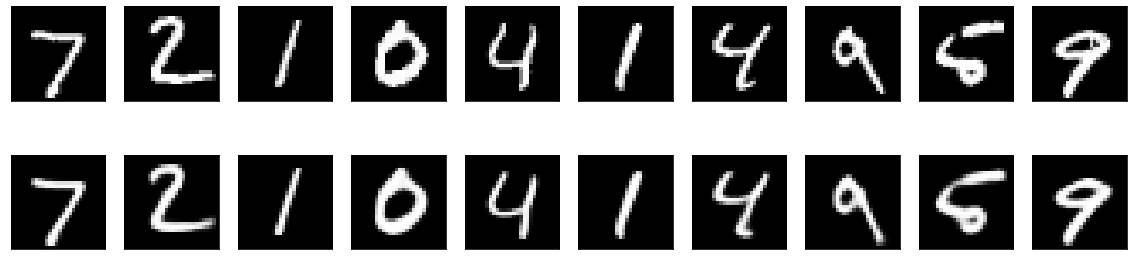

In [ ]:
decoded_imgs = autoencoder_CONV.predict(x_test_CONV)
n = 10
plt.figure(figsize=(20, 5))
for i in range(0,n):
  # display original
  plt.subplot(2, n, i+1)
  plt.imshow(x_test_CONV[i].reshape(28, 28), cmap='gray')
  plt.xticks([])
  plt.yticks([])

  # display reconstruction
  plt.subplot(2, n, i +1+ n)
  plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
  plt.xticks([])
  plt.yticks([])
plt.show()

#### Walking the code space

In [ ]:
encoder = Model(autoencoder_CONV.input, autoencoder_CONV.get_layer(index=11).output)
encoder.summary()

In [ ]:
decoder = Sequential()
for i in range(12, 25):
  decoder.add(autoencoder_CONV.get_layer(index=i))

Text(0.5, 1.0, 'Original Image')

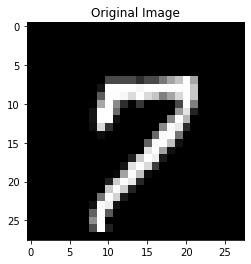

In [ ]:
plt.imshow(x_test[7230], cmap='gray')
plt.title('Original Image')

### Our code is a 64 dimesnional vector. We will change the 17 th dimension of the vector from a range 10 to 100 and visualize the change in re constructed image 

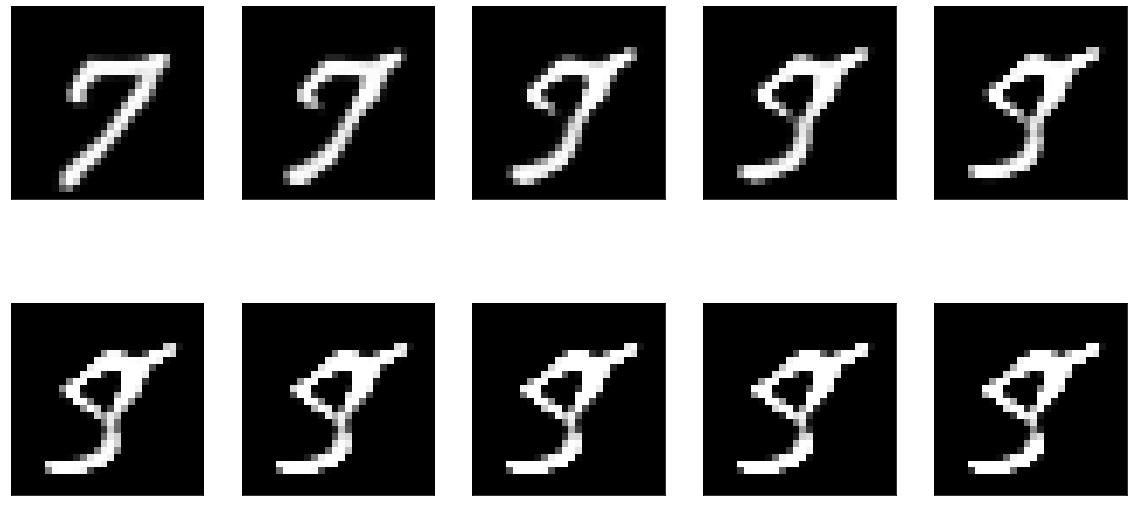

In [ ]:
encoder_Op = encoder.predict(np.expand_dims(x_test_CONV[7230],0))
plt.figure(figsize=(20,10))
count = 1
for i in tf.range(10, 110, 10):
  encoder_Op[0,17] = i.numpy()
  plt.subplot(2, 5, count )
  plt.imshow(decoder.predict(encoder_Op).reshape((28,28)), cmap='gray')
  plt.xticks([])
  plt.yticks([])
  count += 1
plt.show()  

# Unsupervised Classifier

In [ ]:
#Creating subset for training
x_train_sub = x_train_CONV[0:5000]
print(x_train_sub.shape)
y_train_sub = y_train[0:5000]
print(y_train_sub.shape)

(5000, 28, 28, 1)
(5000,)


#### Train autoencoder – freeze encoder – train classifier on top 

In [ ]:
classification = Dense(10, activation='softmax')(encoder.output)
encoder_frezee_clasifier = Model(encoder.input, classification)
for layer in encoder.layers[:-1]:
  layer.trainable = False

encoder_frezee_clasifier.summary()

Model: "model_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0  

In [ ]:
encoder_frezee_clasifier.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

encoder_frezee_clasifier.fit(x_train_sub, y_train_sub,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_CONV, y_test))

Train on 5000 samples, validate on 10000 samples
Epoch 1/10
5000/5000 [==============================] - 4s 826us/step - loss: 2.1396 - accuracy: 0.3538 - val_loss: 1.0250 - val_accuracy: 0.6703
Epoch 2/10
5000/5000 [==============================] - 4s 799us/step - loss: 0.7528 - accuracy: 0.7792 - val_loss: 0.5798 - val_accuracy: 0.8364
Epoch 3/10
5000/5000 [==============================] - 4s 790us/step - loss: 0.5017 - accuracy: 0.8612 - val_loss: 0.4441 - val_accuracy: 0.8704
Epoch 4/10
5000/5000 [==============================] - 4s 796us/step - loss: 0.3967 - accuracy: 0.8930 - val_loss: 0.3716 - val_accuracy: 0.8928
Epoch 5/10
5000/5000 [==============================] - 4s 792us/step - loss: 0.3358 - accuracy: 0.9092 - val_loss: 0.3267 - val_accuracy: 0.9050
Epoch 6/10
5000/5000 [==============================] - 4s 795us/step - loss: 0.3014 - accuracy: 0.9178 - val_loss: 0.3002 - val_accuracy: 0.9156
Epoch 7/10
5000/5000 [==============================] - 4s 805us/step - los

#### Train autoencoder – train classifier on top of encoder. 

In [ ]:
new_classification = Dense(10, activation='softmax')(encoder.output)
encoder_clasifier = Model(encoder.input, new_classification)
encoder_clasifier.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

encoder_clasifier.fit(x_train_sub, y_train_sub,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_CONV, y_test))

Train on 5000 samples, validate on 10000 samples
Epoch 1/10
5000/5000 [==============================] - 4s 809us/step - loss: 2.4873 - accuracy: 0.3306 - val_loss: 1.0443 - val_accuracy: 0.6576
Epoch 2/10
5000/5000 [==============================] - 4s 795us/step - loss: 0.6869 - accuracy: 0.7912 - val_loss: 0.5132 - val_accuracy: 0.8523
Epoch 3/10
5000/5000 [==============================] - 4s 797us/step - loss: 0.4144 - accuracy: 0.8862 - val_loss: 0.3731 - val_accuracy: 0.8981
Epoch 4/10
5000/5000 [==============================] - 4s 791us/step - loss: 0.3236 - accuracy: 0.9170 - val_loss: 0.3162 - val_accuracy: 0.9162
Epoch 5/10
5000/5000 [==============================] - 4s 800us/step - loss: 0.2762 - accuracy: 0.9250 - val_loss: 0.2790 - val_accuracy: 0.9243
Epoch 6/10
5000/5000 [==============================] - 4s 794us/step - loss: 0.2597 - accuracy: 0.9286 - val_loss: 0.2582 - val_accuracy: 0.9309
Epoch 7/10
5000/5000 [==============================] - 4s 798us/step - los

#### No pretraining

In [ ]:
freshInp = Input(shape=(28, 28,1))
X1 = Conv2D(32, (3, 3), activation='relu', padding='valid')(freshInp)
X1 = MaxPooling2D((2, 2), padding='valid')(X1)
X1 = Conv2D(64, (3, 3), activation='relu', padding='valid')(X1)
X1 = MaxPooling2D((2, 2), padding='same')(X1)
X1 = Conv2D(128, (3, 3), activation='relu', padding='valid')(X1)
flat = Flatten()(X1)
fcl_1 = Dense(256)(flat)
actl_1 = Activation('relu')(fcl_1)
fcl_2 = Dense(128)(actl_1)
actl_2 = Activation('relu')(fcl_2)
coder = Dense(64)(actl_2)
clfn = Dense(10, activation='softmax')(coder)

my_classifier = Model(freshInp, clfn)
my_classifier.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

my_classifier.fit(x_train_sub, y_train_sub,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_CONV, y_test))

Train on 5000 samples, validate on 10000 samples
Epoch 1/10
5000/5000 [==============================] - 8s 2ms/step - loss: 0.8942 - accuracy: 0.7210 - val_loss: 0.2854 - val_accuracy: 0.9115
Epoch 2/10
5000/5000 [==============================] - 7s 1ms/step - loss: 0.2193 - accuracy: 0.9332 - val_loss: 0.2775 - val_accuracy: 0.9110
Epoch 3/10
5000/5000 [==============================] - 7s 1ms/step - loss: 0.1692 - accuracy: 0.9470 - val_loss: 0.1338 - val_accuracy: 0.9590
Epoch 4/10
5000/5000 [==============================] - 8s 2ms/step - loss: 0.0957 - accuracy: 0.9734 - val_loss: 0.1229 - val_accuracy: 0.9607
Epoch 5/10
5000/5000 [==============================] - 8s 2ms/step - loss: 0.0747 - accuracy: 0.9764 - val_loss: 0.0941 - val_accuracy: 0.9703
Epoch 6/10
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0750 - accuracy: 0.9756 - val_loss: 0.0813 - val_accuracy: 0.9737
Epoch 7/10
5000/5000 [==============================] - 8s 2ms/step - loss: 0.0467 - ac

In [ ]:
np.argmax(my_classifier.predict(np.expand_dims(x_test_CONV[7230],0)), -1)

array([7])

In [ ]:
my_classifier.predict(np.expand_dims(x_test_CONV[7230],0))[0,7]

0.99983513

In [ ]:
np.argmax(encoder_clasifier.predict(np.expand_dims(x_test_CONV[7230],0)), -1)

array([7])

In [ ]:
encoder_clasifier.predict(np.expand_dims(x_test_CONV[7230],0))[0,7]

0.9264568

In [ ]:
np.argmax(encoder_frezee_clasifier.predict(np.expand_dims(x_test_CONV[7230],0)), -1)

array([7])

In [ ]:
encoder_frezee_clasifier.predict(np.expand_dims(x_test_CONV[7230],0))[0,7]

0.9810463